In [1]:
# FIRST I WILL IMPORT ALL THE PACKAGES

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings as wrn
wrn.filterwarnings('ignore')

In [5]:
# NOW I WILL READ AND UNDERSTAND THE DATA

In [6]:
Input = pd.read_csv('drive/MyDrive/advertising.csv')
ad = pd.DataFrame(Input)
ad.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [7]:
ad.shape

(200, 4)

In [8]:
ad.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [9]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# NOW I WILL CLEAN THE DATA FOR REMOVING NULL VALUES

In [11]:
ad.isnull().sum()*100/ad.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

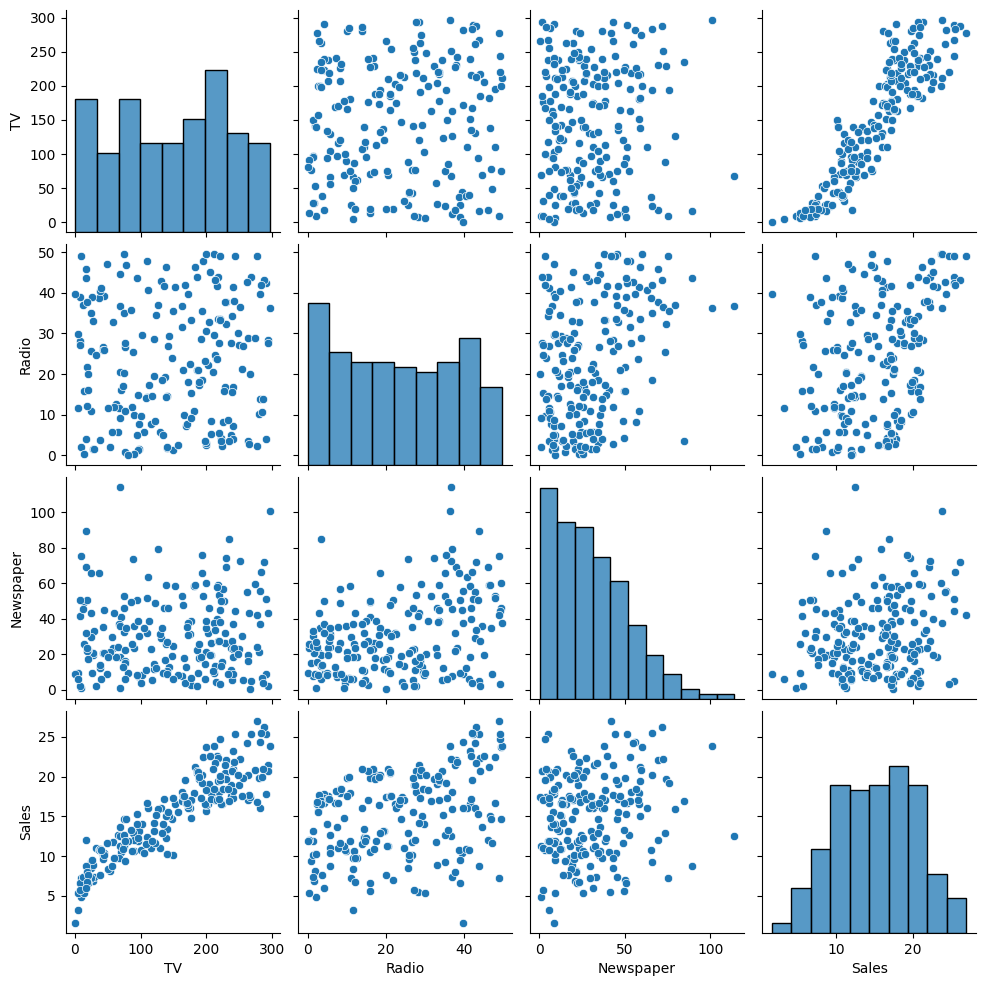

In [12]:
sns.pairplot(ad)
plt.show()

In [13]:
#EDA

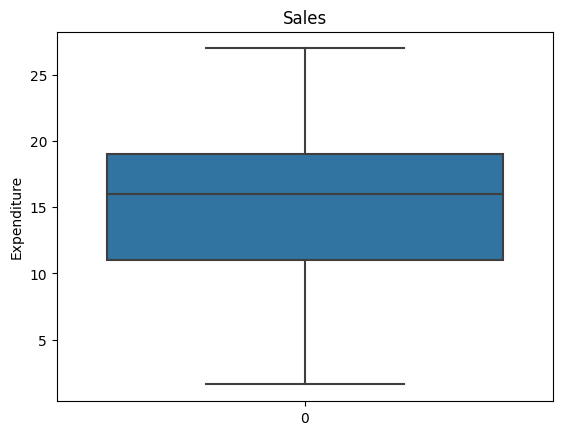

In [14]:
sns.boxplot(ad['Sales'])
plt.ylabel('Expenditure')
plt.title('Advertising Expenditure Distribution')
plt.title('Sales')
plt.show()

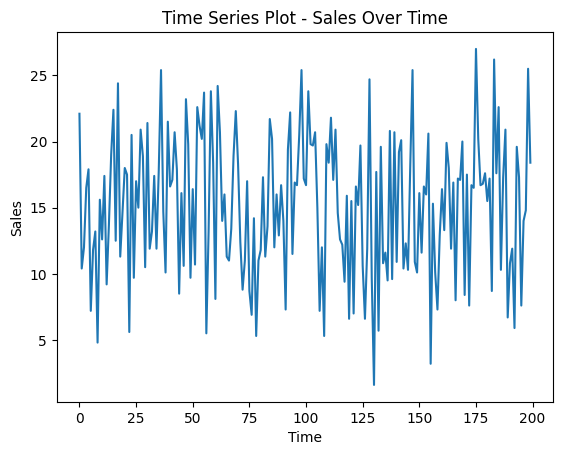

In [15]:
plt.plot(ad['Sales'])
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Time Series Plot - Sales Over Time')
plt.show()

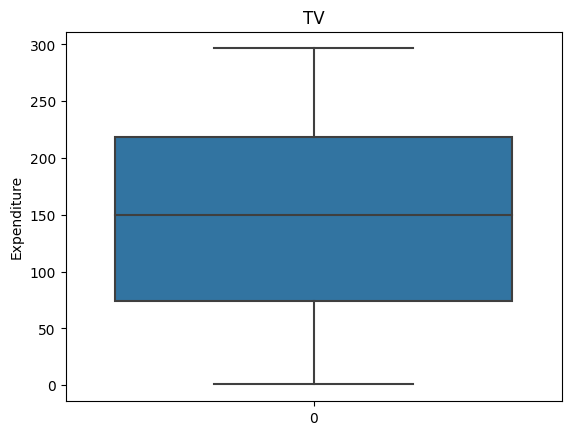

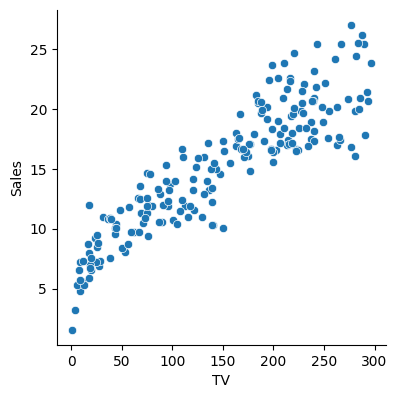

In [16]:
sns.boxplot(ad['TV'])
plt.ylabel('Expenditure')
plt.title('TV')
plt.show()

sns.pairplot(ad, x_vars=['TV'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

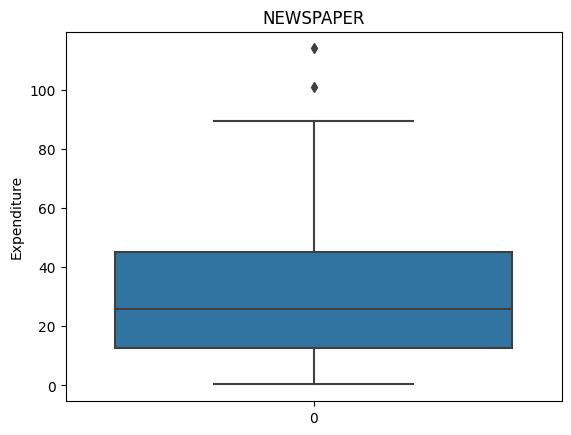

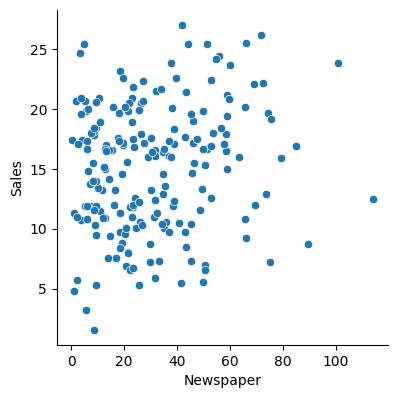

In [17]:
sns.boxplot(ad['Newspaper'])
plt.ylabel('Expenditure')
plt.title('NEWSPAPER')
plt.show()

sns.pairplot(ad, x_vars=['Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

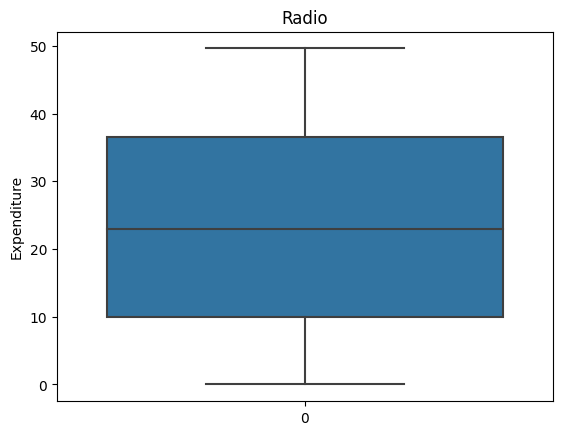

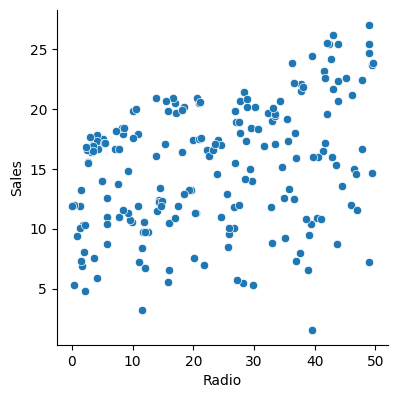

In [18]:
sns.boxplot(ad['Radio'])
plt.ylabel('Expenditure')
plt.title('Radio')
plt.show()

sns.pairplot(ad, x_vars=['Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

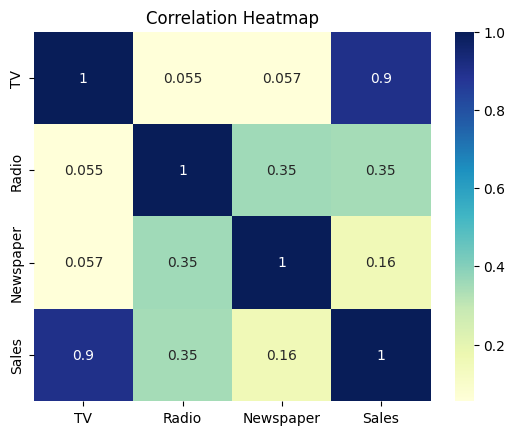

In [19]:
sns.heatmap(ad.corr(), cmap="YlGnBu", annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
''' SO FOR MODEL BUILDING I WILL PERFORM SIMPLE LINEAR REGRESSION !
    y = c + m1 x TV '''

' SO FOR MODEL BUILDING I WILL PERFORM SIMPLE LINEAR REGRESSION !\n    y = c + m1 x TV '

In [21]:
x = ad['TV']
y = ad['Sales']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [23]:
x_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [24]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [25]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train , x_train_sm).fit()
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        12:09:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

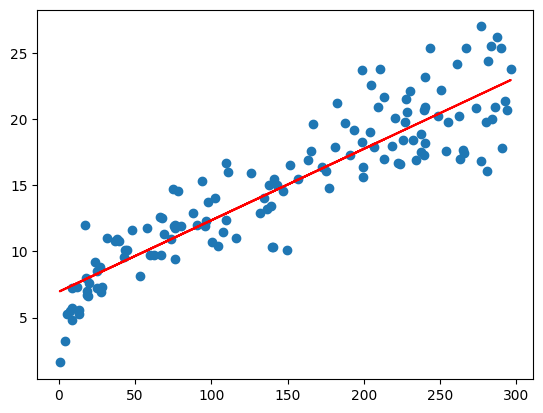

In [27]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [28]:
#MODEL EVALUATION - ERROR TERMS

y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

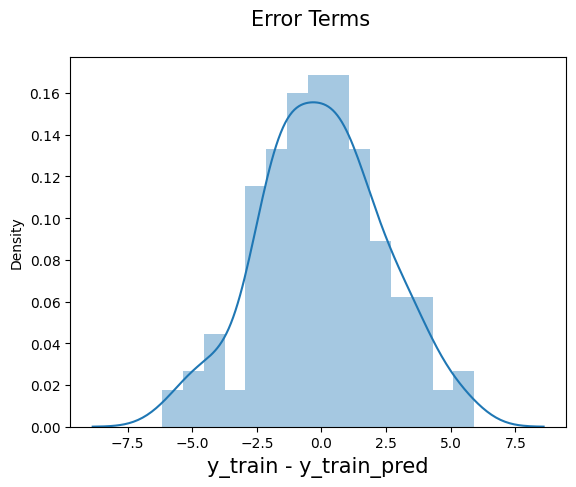

In [29]:
# PLOT & X LABEL
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

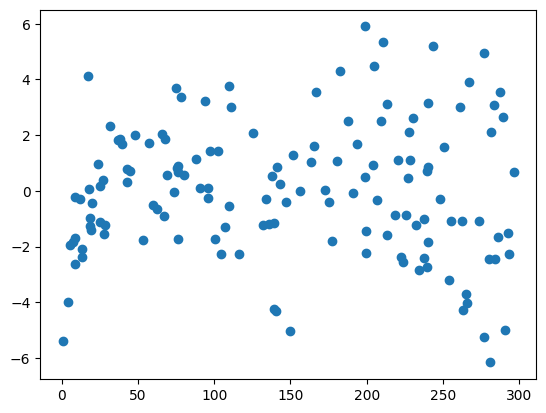

In [30]:
plt.scatter(x_train,res)
plt.show()

In [31]:
#Now prediction on a test set

x_test_sm = sm.add_constant(x_test)

y_pred = lr.predict(x_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [33]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [34]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

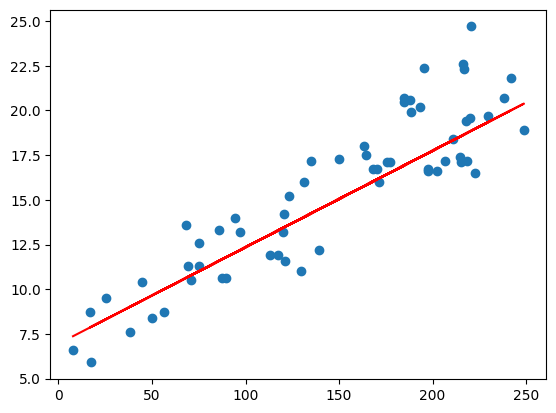

In [35]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

In [36]:
ad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
